# User Retenation & Revenue Analysis

Google-Style Data Analyst Project

## 1. Load libraries and data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('subscription_user_behavior.csv')
df.head()

,user_id,signup_date,country,device_type,acquisition_channel,plan_type,monthly_price,sessions_per_month,avg_session_duration,features_used,support_tickets,engagement_score,churned,churn_date,lifetime_value
0,1,2024-04-12,Canada,Tablet,Ads,Free,0,13,43,11,1,559,1,1.720397e+18,0
1,2,2024-12-14,USA,Mobile,Referral,Basic,10,14,40,7,1,560,1,1.739578e+18,20
2,3,2024-09-27,USA,Tablet,Email,Pro,25,34,34,1,2,1156,0,NaN,250
3,4,2024-04-16,Germany,Mobile,Ads,Basic,10,38,26,4,0,988,0,NaN,70
4,5,2024-03-12,Germany,Mobile,Ads,Free,0,46,9,4,2,414,1,1.718669e+18,0


## 2. Data cleaning

In [7]:
df.info()

df['signup_date'] = pd.to_datetime(df['signup_date'])
df['churn_date'] = pd.to_datetime(df['churn_date'], errors = 'coerce')

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user_id               50000 non-null  int64         
 1   signup_date           50000 non-null  datetime64[ns]
 2   country               50000 non-null  object        
 3   device_type           50000 non-null  object        
 4   acquisition_channel   50000 non-null  object        
 5   plan_type             50000 non-null  object        
 6   monthly_price         50000 non-null  int64         
 7   sessions_per_month    50000 non-null  int64         
 8   avg_session_duration  50000 non-null  int64         
 9   features_used         50000 non-null  int64         
 10  support_tickets       50000 non-null  int64         
 11  engagement_score      50000 non-null  int64         
 12  churned               50000 non-null  int64         
 13  churn_date      

user_id                     0
signup_date                 0
country                     0
device_type                 0
acquisition_channel         0
plan_type                   0
monthly_price               0
sessions_per_month          0
avg_session_duration        0
features_used               0
support_tickets             0
engagement_score            0
churned                     0
churn_date              22879
lifetime_value              0
dtype: int64

## 3. Feature Engineering

In [8]:

df['engagement_score'] = df['sessions_per_month'] * df['avg_session_duration']
df[['sessions_per_month', 'avg_session_duration', 'engagement_score']].head()

,sessions_per_month,avg_session_duration,engagement_score
0,13,43,559
1,14,40,560
2,34,34,1156
3,38,26,988
4,46,9,414


## Exploratory Data Analysis

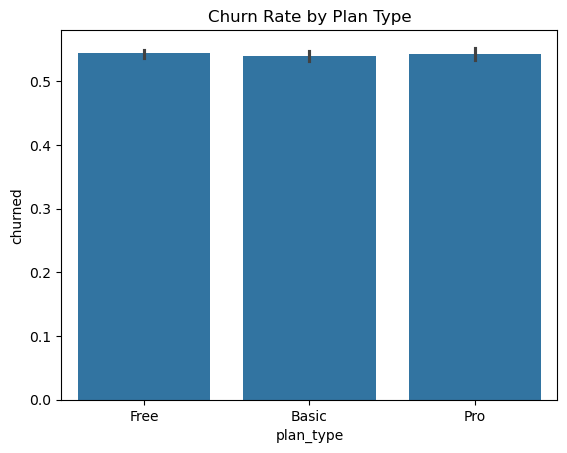

In [10]:

sns.barplot(x='plan_type', y = 'churned', data = df)
plt.title('Churn Rate by Plan Type')
plt.show()


## 5. Revenue & LTV Analysis

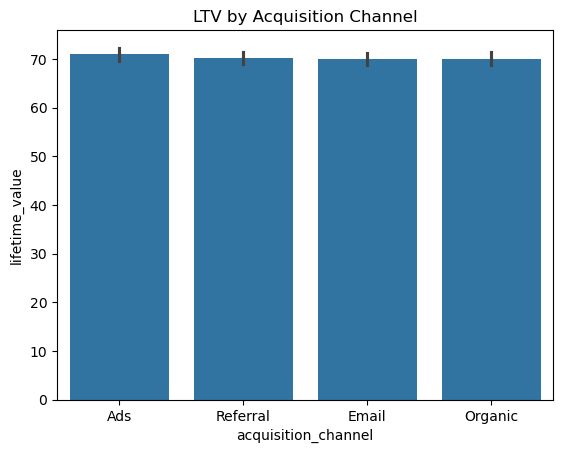

In [12]:

sns.barplot(x = 'acquisition_channel', y = 'lifetime_value', data = df)
plt.title('LTV by Acquisition Channel')
plt.show()


## 6. Engagement VS Churn

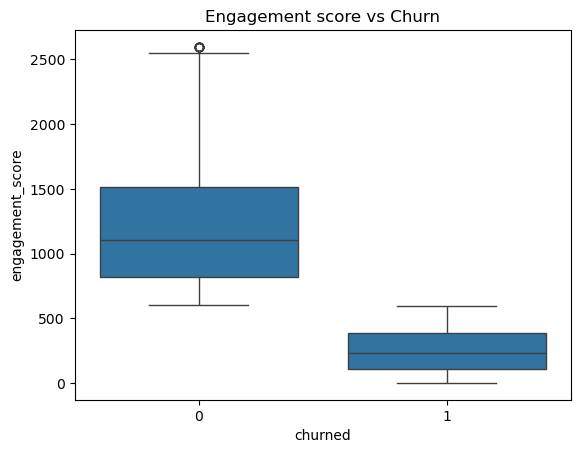

In [13]:

sns.boxplot(x = 'churned', y = 'engagement_score', data = df)
plt.title('Engagement score vs Churn')
plt.show()


## 7. Key Insights

* Free users churn significantly more than paid users.
* Higher engagement strongly correlates with retention.
* Referral channel users generate the highest LTV(Life Time Value).

## 8. Business Recommendations

* Improve onboarding for free users.
* Encourage feature discovery early.
* Invest more in referral and organic channels